# The Two Time Pad

That two-timing thing...

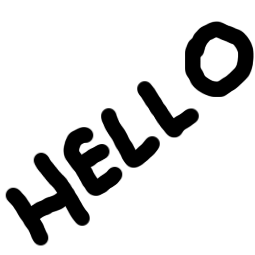

In [7]:
from PIL import Image

hello_img = Image.open("hello.bmp")
hello_img = hello_img.convert('RGB')

hello_img

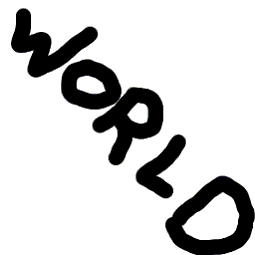

In [8]:
world_img = Image.open("world.bmp")
world_img = world_img.convert('RGB')

world_img

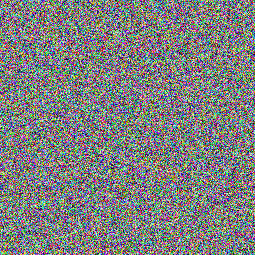

In [9]:
import numpy as np

# get the array of random pixels
i_array = np.random.rand(255,255,3) * 255
i_array = i_array.astype('uint8')

# convert to image (key)
img_key = Image.fromarray(i_array).convert('RGB')

#display
img_key

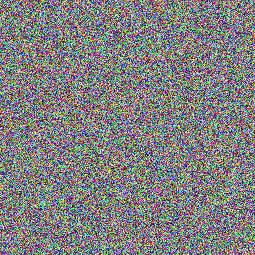

In [10]:
def image_xor(im1, im2):
    if im1.size != im2.size:
        print "Size unmatched"
        return
    
    result = Image.new('RGB', im1.size, "black")
    res_pix = result.load()
    
    im1_pix = im1.load()
    im2_pix = im2.load()
    
    for i in xrange(im1.size[0]):
        for j in xrange(im1.size[1]):
            res_pix[i,j] = tuple([(v[0] ^ v[1]) % 256 for v in zip(im1_pix[i,j], im2_pix[i,j])])
    
    return result

# 'hello' image
c1 = image_xor(hello_img, img_key)

c1

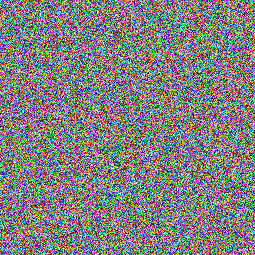

In [11]:
c2 = image_xor(world_img, img_key)

c2

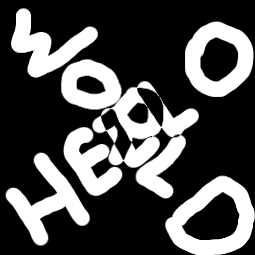

In [12]:
tadaah = image_xor(c1, c2)

# TADAAH!
tadaah

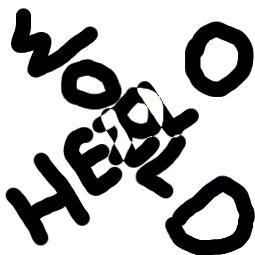

In [13]:
final = image_xor(tadaah, Image.new('RGB', tadaah.size, "white"))

final